<a href="https://colab.research.google.com/github/JesusDavGarcia/ChainLadderMethod/blob/main/Data_Understanding_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

---

This document seeks to implement the second phase of the CRISP-DM, the *data understanding phase*, for the hypothetical project of using a Chain Ladder Method to estimate the required claim reserves for the company *Chubb Limited*.


<div style="display: flex; justify-content: center;">
  <img src="https://drive.google.com/uc?id=15oAsKi2SkMKulXuHALTQ-HNh4OhaFI31" alt="Image Alt Text" width="500" height="500">
</div>


This phase seeks to examine the general properties of the data, explore some of its characteristics, revise its quality, and report on the results. More specifically, it will go into the following details:



1.   **Data Description**
2.   **Data Exploration**
2.   **Data Quality**


---

## **1.  Data Description**

This dataset has the historic claims on workers compensation insurance for several years. From the company's database we had access to the following variables:


1.   **GRCODE:** NAIC (National Association of Insurance Commissioners) company code, which is a unique identifier for each insurance company or group.
2.   **GRNAME:** NAIC company name, the name of the insurance company or group corresponding to the NAIC code.
3.   **AccidentYear:** The year in which accidents or claims occurred ranging from 1988 to 1997.
4.   **DevelopmentYear:** The year in which the claim is developed or reported, and it can go from 10 years since the accident year.
5.   **DevelopmentLag:** The development lag, which appears to be calculated as (AY-1987 + DY-1987 - 1). It likely represents the time period between when the accident occurred and when the losses were reported or settled.
6.   **IncurLoss:**  Incurred losses and allocated expenses reported at the end of the specified year. This column likely contains financial data related to the costs incurred by the insurer due to claims and expenses.
7.   **CumPaidLoss_:** Cumulative paid losses and allocated expenses at the end of the specified year. This represents the total amount of money paid out by the insurer for claims and expenses up to that year.
8.   **BulkLoss_:** Bulk and IBNR (Incurred But Not Reported) reserves on net losses and defense and cost containment expenses reported at the end of the year. This column might contain data related to reserves set aside for future claims and expenses.
9.   **PostedReserve97_:** Posted reserves in the year 1997 taken from the Underwriting and Investment Exhibit – Part 2A, including net losses unpaid and unpaid loss adjustment expenses. This likely represents a specific reserve amount for the year 1997.
10.   **EarnedPremDIR_:** Premiums earned at the incurral year - direct and assumed. This column could contain data related to the premiums earned by the insurer for policies issued in the specified year.
11.   **EarnedPremCeded_:** Premiums earned at the incurral year - ceded. This might represent premiums earned but then ceded to reinsurance companies.
12.   **EarnedPremNet_:**  Premiums earned at the incurral year - net. This column likely represents the net premiums earned after accounting for both direct and ceded premiums.
13.   **Single:** A binary indicator where 1 indicates a single insurance entity, and 0 indicates a group insurer. This column could be used to classify insurance companies as either standalone entities or part of a group.

We will proceed further describing the variables by answering some initial questions:

In [1]:
#Uploading the File
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/wkcomp_pos.csv'

# Read the CSV file into a DataFrame called wkcomp
wkcomp = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. How big is the dataset?








In [2]:
num_rows, num_cols = wkcomp.shape

# Create a table in Markdown format
table = f"""
| Property                       | Value |
|-------------------------------|-------|
| Number of rows (entries)      | {num_rows}     |
| Number of columns (variables) | {num_cols}     |
"""

# Display the table using Markdown
from IPython.display import Markdown
Markdown(table)


| Property                       | Value |
|-------------------------------|-------|
| Number of rows (entries)      | 13200     |
| Number of columns (variables) | 13     |




```
# This is formatted as code
```

We have a total of 13200 entries among 13 variables. The dataset size is 13 x 13200.

### 2. What are the data types of the dataset?





In [3]:
from tabulate import tabulate

# Assuming 'wkcomp' is your DataFrame
# You can read it from a CSV file as shown in a previous response

# Get the data types of each column
data_types = wkcomp.dtypes

# Create a table with variable names and data types
variable_info = pd.DataFrame({
    'Variable Name': data_types.index,
    'Data Type': data_types.values
})

# Adjust the row index to start from 1
variable_info.index += 1

# Print the table with a more attractive format
print(tabulate(variable_info, headers='keys', tablefmt='fancy_grid'))

# Attempt to convert the 'GRNAME' column to numeric, replacing non-convertible values with NaN
numeric_grname = pd.to_numeric(wkcomp['GRNAME'], errors='coerce')

# Check if there are any NaN values in the 'numeric_grname' Series
if numeric_grname.isna().any():
    print("The 'GRNAME' column contains non-numeric values such as:")
else:
    print("The 'GRNAME' column does not contain non-numeric values.")


# Get unique values from the 'GRNAME' column
unique_grname_values = wkcomp['GRNAME'].unique()

# Print some of the unique values for insight
for value in unique_grname_values[:10]:  # Print the first 10 unique values
    print(value)


╒════╤═══════════════════╤═════════════╕
│    │ Variable Name     │ Data Type   │
╞════╪═══════════════════╪═════════════╡
│  1 │ GRCODE            │ int64       │
├────┼───────────────────┼─────────────┤
│  2 │ GRNAME            │ object      │
├────┼───────────────────┼─────────────┤
│  3 │ AccidentYear      │ int64       │
├────┼───────────────────┼─────────────┤
│  4 │ DevelopmentYear   │ int64       │
├────┼───────────────────┼─────────────┤
│  5 │ DevelopmentLag    │ int64       │
├────┼───────────────────┼─────────────┤
│  6 │ IncurLoss_D       │ int64       │
├────┼───────────────────┼─────────────┤
│  7 │ CumPaidLoss_D     │ int64       │
├────┼───────────────────┼─────────────┤
│  8 │ BulkLoss_D        │ int64       │
├────┼───────────────────┼─────────────┤
│  9 │ EarnedPremDIR_D   │ int64       │
├────┼───────────────────┼─────────────┤
│ 10 │ EarnedPremCeded_D │ int64       │
├────┼───────────────────┼─────────────┤
│ 11 │ EarnedPremNet_D   │ int64       │
├────┼──────────

As expected, all variables except for GRNAME are integers. Checking further into "GRNAME", which appeared as "object", we found it only contains non-numeric values. Printing some of its values, we can see they effectively correspond to companies names.

## **2.   Data Exploration**

What sort of hypotheses have you formed about the data?
Which attributes seem promising for further analysis?
Have your explorations revealed new characteristics about the data?
How have these explorations changed your initial hypothesis?
Can you identify particular subsets of data for later use?
Take another look at your data mining goals. Has this exploration altered the goals?
Analyze properties of interesting attributes in detail (e.g. basic
statistics interesting sub-populations).
■ Identify characteristics of sub-populations.





### 1. How many companies are there in the dataset?





In [4]:
# Count the number of unique companies in the 'GRNAME' column
unique_companies = wkcomp['GRNAME'].nunique()

print("Number of unique companies:", unique_companies)

Number of unique companies: 132


There is a total of 132 companies. At first glance, this seems as enough data to carry a robust analysis. We will have data of 132 run-off triangles, and 132 observations are enough to have representative information for a population.

### 2. What is the range for the numeric variables?



In [5]:
# Exclude non-integer columns
integer_columns = wkcomp.select_dtypes(include='int64').columns

# Create an empty list to store DataFrames for each column
column_ranges = []

# Populate the list with DataFrames containing column names and ranges
for column in integer_columns:
    min_value = wkcomp[column].min()
    max_value = wkcomp[column].max()
    column_ranges.append(pd.DataFrame({'Column Name': [column], 'Range': [f'{min_value} to {max_value}']}))

# Concatenate the DataFrames in the list into a single DataFrame
result = pd.concat(column_ranges, ignore_index=True)

# Print the table
print(result)

          Column Name            Range
0              GRCODE      86 to 44300
1        AccidentYear     1988 to 1997
2     DevelopmentYear     1988 to 2006
3      DevelopmentLag          1 to 10
4         IncurLoss_D    -59 to 367404
5       CumPaidLoss_D   -338 to 325322
6          BulkLoss_D  -4621 to 145296
7     EarnedPremDIR_D  -6518 to 421223
8   EarnedPremCeded_D   -3522 to 78730
9     EarnedPremNet_D  -9731 to 418755
10             Single           0 to 1
11  PostedReserve97_D     0 to 1090093


Surprisingly, some variables have negative and positive values. As a first thought, this shouldn´t be the case as these columns are losses, and should be expressed as an absolute term. Are these negative values an income for the company? If that is the case, how does this income work? Earned Premiums also have negative values, which also seems weird as it is supposed to be the income for the company.

### 3. Are there negative values in the numeric columns? (Double Check)

Let´s double check for variables that have negative values:



In [6]:
# Exclude the 'GRNAME' column from the numeric columns
numeric_columns = wkcomp.select_dtypes(include='number').columns

# Create a boolean DataFrame indicating where values are less than 0
negative_values = wkcomp[numeric_columns] < 0

# Check if any value in each column is less than 0 and print column names with negative values
columns_with_negative_values = negative_values.any()

# Print the names of columns with negative values
negative_columns = columns_with_negative_values[columns_with_negative_values].index
print("Columns with values less than 0:")
print(negative_columns)

Columns with values less than 0:
Index(['IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D',
       'EarnedPremCeded_D', 'EarnedPremNet_D'],
      dtype='object')


### 4. How much does Cumulative Losses change from Year of the accident to ten years later (development year == 10)?




In [7]:
import pandas as pd

# Assuming 'wkcomp' is your DataFrame

# Filter rows where DevelopmentLag is 10
cumulative_losses_10 = wkcomp[wkcomp['DevelopmentLag'] == 10]['CumPaidLoss_D']

# Calculate the average CumPaidLoss_D for DevelopmentLag == 10
average_loss_10 = cumulative_losses_10.mean()

# Filter rows where DevelopmentLag is 1
cumulative_losses_1 = wkcomp[wkcomp['DevelopmentLag'] == 1]['CumPaidLoss_D']

# Calculate the average CumPaidLoss_D for DevelopmentLag == 1
average_loss_1 = cumulative_losses_1.mean()

# Calculate the percentage change
percentage_change = ((average_loss_10 - average_loss_1) / average_loss_1) * 100

print(f"Average Cumulative Losses at DevelopmentLag 10: {average_loss_10}")
print(f"Average Cumulative Losses at DevelopmentLag 1: {average_loss_1}")
print(f"Average Percentage Change from DevelopmentLag 1 to 10: {percentage_change:.2f}%")




Average Cumulative Losses at DevelopmentLag 10: 10186.007575757576
Average Cumulative Losses at DevelopmentLag 1: 2547.6886363636363
Average Percentage Change from DevelopmentLag 1 to 10: 299.81%


The average difference from Year 1 to Year 10 on the claims is 299.81%. This reinforces the importance of an accurate model to predict provisions values for the company to have an adequate and realistic reserve for future claims. Doing a broad claim, an insurer can expect the ultimate expense for a year to be about 4 times the expenses for the claims reported on the first year.


*Graph of the behaviour of Cumulative Losses from Year 1 to 10:*

### 5. What is the difference between Cumulative Losses and Net Premiums Earned (i.e., how much is earned on average)?




In [8]:
import pandas as pd

# Assuming 'wkcomp' is your DataFrame

# Filter rows where DevelopmentLag is 10
filtered_data = wkcomp[wkcomp['DevelopmentLag'] == 10]

# Calculate the sum of 'EarnedPremNet_D' for DevelopmentLag == 10
total_earned_prem_net_10 = filtered_data['EarnedPremNet_D'].sum()
total_losses_10 = filtered_data['CumPaidLoss_D'].sum()

# Calculate the percentage difference
percentage_difference = ((total_earned_prem_net_10 - total_losses_10) / total_losses_10) * 100

print(f"Total EarnedPremNet_D for DevelopmentLag 10: {total_earned_prem_net_10}")
print(f"Total Losses for DevelopmentLag 10: {total_losses_10}")
print(f"Percentage Difference: {percentage_difference:.2f}%")



Total EarnedPremNet_D for DevelopmentLag 10: 21946490
Total Losses for DevelopmentLag 10: 13445530
Percentage Difference: 63.23%


The insurance industry is quite profitable. The difference between the earned net premiums and the cumulative losses at year 10 after an accident is 63.23%

## 3.   Data Quality

types of problems:

Missing data include values that are blank or coded as a non-response (such as $null$, ?, or 999).
Data errors are usually typographical errors made in entering the data.
Measurement errors include data that are entered correctly but are based on an incorrect measurement scheme.
Coding inconsistencies typically involve nonstandard units of measurement or value inconsistencies, such as the use of both M and male for gender.
Bad metadata include mismatches between the apparent meaning of a field and the meaning stated in a field name or definition.


### 1. Are there missing values in any column?





In [9]:
# Check for missing values in each column
missing_values = wkcomp.isna().sum()

# Create a table with variable names and the number of missing values
missing_values_table = pd.DataFrame({
    'Variable Name': missing_values.index,
    'Missing Values': missing_values.values
})

# Print the table with variable names and missing values
print("Table of Variable Names and Missing Values:")
print(missing_values_table)

Table of Variable Names and Missing Values:
        Variable Name  Missing Values
0              GRCODE               0
1              GRNAME               0
2        AccidentYear               0
3     DevelopmentYear               0
4      DevelopmentLag               0
5         IncurLoss_D               0
6       CumPaidLoss_D               0
7          BulkLoss_D               0
8     EarnedPremDIR_D               0
9   EarnedPremCeded_D               0
10    EarnedPremNet_D               0
11             Single               0
12  PostedReserve97_D               0


### 2. Is it the case that every accident year has 10 years of development lag?





In [10]:
### Check if every year has a development lag of at least 10.
# Group the data by accident year and calculate the maximum development lag
max_dev_lag_by_year = wkcomp.groupby('AccidentYear')['DevelopmentLag'].max()
print(max_dev_lag_by_year)
print()
# Check if all years have a maximum development lag of 10
all_years_have_10_lag = all(max_dev_lag_by_year == 10)

if all_years_have_10_lag:
    print("All accident years have exactly 10 years of development lag.")
else:
    print("Not all accident years have 10 years of development lag.")

### Check if the development lag always goes from 1 to 10 to avoid having missing years.
# Define the expected sequence
expected_sequence = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize variables to track the current position in the expected sequence
current_position = 0

# Initialize a variable to track the current 'AccidentYear'
current_accident_year = None

# Initialize a flag to track if the sequence repeats
sequence_repeats = True

# Iterate through the 'DevelopmentLag' column
for index, row in wkcomp.iterrows():
    year = row['AccidentYear']
    lag = row['DevelopmentLag']

    if year != current_accident_year:
        # If a new 'AccidentYear' is encountered, reset the position in the sequence
        current_position = 0
        current_accident_year = year

    if lag != expected_sequence[current_position]:
        # If the lag value doesn't match the expected sequence, set the flag to False
        sequence_repeats = False
        break

    # Move to the next position in the sequence
    current_position = (current_position + 1) % len(expected_sequence)

if sequence_repeats:
    print("The 'DevelopmentLag' column follows the sequence 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 and repeats itself.")
else:
    print("The 'DevelopmentLag' column does not follow the specified sequence and repetition pattern.")

AccidentYear
1988    10
1989    10
1990    10
1991    10
1992    10
1993    10
1994    10
1995    10
1996    10
1997    10
Name: DevelopmentLag, dtype: int64

All accident years have exactly 10 years of development lag.
The 'DevelopmentLag' column follows the sequence 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 and repeats itself.


## Building the Run Off Triangles for 1 Company

We will build a run-off triangle for the first company in the list, to check the format of the triangles:

In [11]:

import numpy as np

# Assuming 'wkcomp' is your DataFrame

# Step 1: Filter data for "Allstate Ins Co Grp" and accident years 1988 to 1997
filtered_data = wkcomp[(wkcomp['GRNAME'] == 'Allstate Ins Co Grp') & (wkcomp['AccidentYear'] >= 1988) & (wkcomp['AccidentYear'] <= 1997)]

# Step 2: Create an empty matrix (runoff triangle)
development_years = np.arange(1, 11)  # Development lags 1 to 10
accident_years = np.arange(1988, 1998)  # Accident years 1988 to 1997
runoff_triangle = pd.DataFrame(index=accident_years, columns=development_years)

# Step 3: Fill in the matrix with 'CumPaidLoss_D' values
for acc_year in accident_years:
    for dev_year in development_years:
        # Find the corresponding row in the filtered data
        row = filtered_data[(filtered_data['DevelopmentYear'] == (acc_year + dev_year - 1)) & (filtered_data['AccidentYear'] == acc_year)]

        # Get the 'CumPaidLoss_D' value, or 0 if no matching data
        if not row.empty:
            value = row['CumPaidLoss_D'].values[0]
        else:
            value = 0

        # Fill in the matrix
        runoff_triangle.at[acc_year, dev_year] = value


# Create a copy of the runoff triangle for normalization
normalized_triangle = runoff_triangle.copy()

# Calculate proportions
for acc_year in range(1988, 1998):
    for dev_year in range(1, 10):
        normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]

# Set all values in column 10 to 1.0
normalized_triangle[10] = 1.0

from tabulate import tabulate

# Display the runoff triangle using tabulate
print("Runoff Triangle of Allstate Ins Co Grp (Dollar Value)")
print(tabulate(runoff_triangle, headers='keys', tablefmt='fancy_grid'))

# Display the normalized triangle using tabulate
print("\nNormalized Triangle of Allstate Ins Co Grp (Proportions, Last Year is Base or 1.0)")
print(tabulate(normalized_triangle, headers='keys', tablefmt='fancy_grid'))


Runoff Triangle of Allstate Ins Co Grp (Dollar Value)
╒══════╤═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│      │     1 │      2 │      3 │      4 │      5 │      6 │      7 │      8 │      9 │     10 │
╞══════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ 1988 │ 70571 │ 155905 │ 220744 │ 251595 │ 274156 │ 287676 │ 298499 │ 304873 │ 321808 │ 325322 │
├──────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ 1989 │ 66547 │ 136447 │ 179142 │ 211343 │ 231430 │ 244750 │ 254557 │ 270059 │ 273873 │ 277574 │
├──────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ 1990 │ 52233 │ 133370 │ 178444 │ 204442 │ 222193 │ 232940 │ 253337 │ 256788 │ 261166 │ 263000 │
├──────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ 1991 │ 59315 │ 128051 │ 169793 │ 196685 │ 213165 │ 234676 │ 23

**The first run-off table** was built using the Cumulative Losses for the Company Allstate Ins Co Grp. For example, losses for the accident year 1988 were \$70.571 as reported for that year but amounted a total of $325.322 after 10 years. That shows that many claims for the accident year 1988 were reported several years after the incident occurred.

**The second run-off table** uses the dollar value of the last year (year 10) as the base (of 1.0), and calculates the proportion of cumulative losses of one year compared to the next one. To be more clear, the 2.20919 in the year 1 of 1988 means that the cumulative losses reported on the development year 1989 (the second year) were 2.20919 times the ones reported on 1988, the previous year.

Just ***to validate this***, the cumulative losses as of 1988 were \$70.571, and as for the next year, 1989, the value was \$155.905. The value of \$155.905 is effectively 2.20919 times the previous value of \$70.571. If we had this information and were standing in the first year of an accident year, we know the next year we can expect cumulative losses to increase by 2.20919 times, and with this information we can make the appropiate provision.

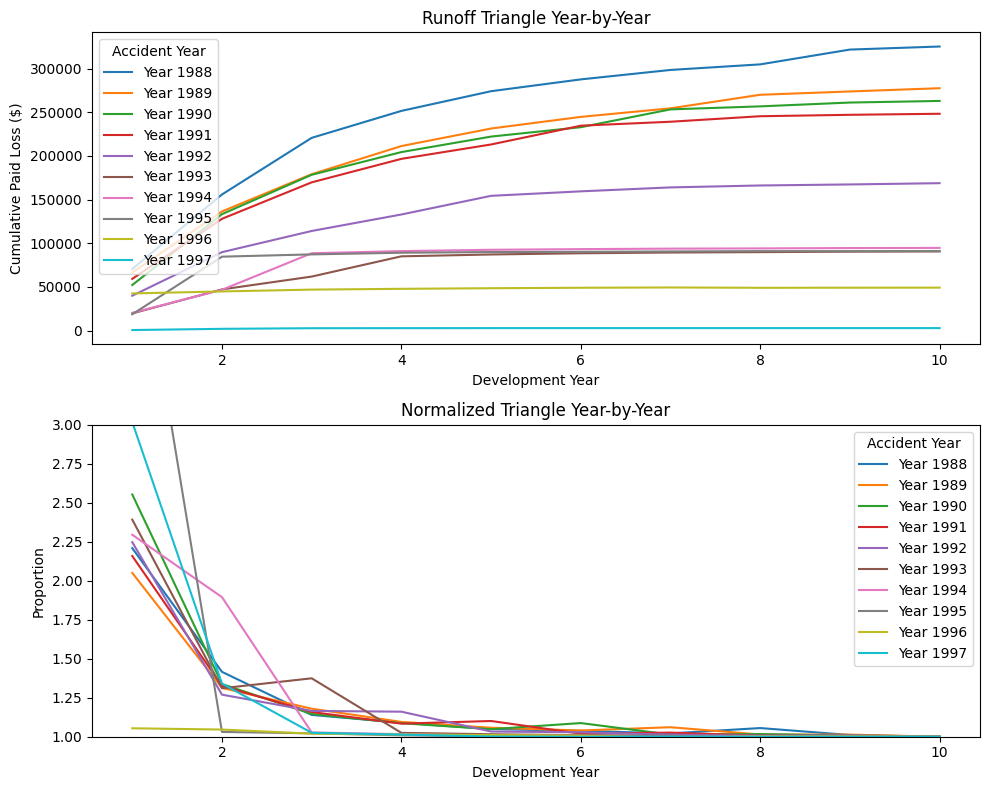

In [12]:
import matplotlib.pyplot as plt

# Assuming you have 'runoff_triangle' and 'normalized_triangle' DataFrames

# Create a figure and axis for the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the runoff triangle
ax[0].set_title("Runoff Triangle Year-by-Year")
ax[0].set_xlabel("Development Year")
ax[0].set_ylabel("Cumulative Paid Loss ($)")
for year in runoff_triangle.index:
    ax[0].plot(runoff_triangle.columns, runoff_triangle.loc[year], label=f"Year {year}")

# Plot the normalized triangle
ax[1].set_title("Normalized Triangle Year-by-Year")
ax[1].set_xlabel("Development Year")
ax[1].set_ylabel("Proportion")
for year in normalized_triangle.index:
    ax[1].plot(normalized_triangle.columns, normalized_triangle.loc[year], label=f"Year {year}")

# Set y-axis limits for the normalized triangle
ax[1].set_ylim(1, 3)

# Add legends
ax[0].legend(loc='best', title='Accident Year')
ax[1].legend(loc='best', title='Accident Year')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



The previous two graphs show how the cumulative losses change from year to year in dollar amounts and as a proportion compared to the next year. Let´s build an avarage for every year and see how claims evolve over time on average:

In [13]:


# Step 1: Filter data for "Allstate Ins Co Grp" and accident years 1988 to 1997
filtered_data = wkcomp[(wkcomp['GRNAME'] == 'Allstate Ins Co Grp') & (wkcomp['AccidentYear'] >= 1988) & (wkcomp['AccidentYear'] <= 1997)]

# Step 2: Create an empty matrix (runoff triangle)
development_years = np.arange(1, 11)  # Development lags 1 to 10
accident_years = np.arange(1988, 1998)  # Accident years 1988 to 1997
runoff_triangle = pd.DataFrame(index=accident_years, columns=development_years)

# Step 3: Fill in the matrix with 'CumPaidLoss_D' values
for acc_year in accident_years:
    for dev_year in development_years:
        # Find the corresponding row in the filtered data
        row = filtered_data[(filtered_data['DevelopmentYear'] == (acc_year + dev_year - 1)) & (filtered_data['AccidentYear'] == acc_year)]

        # Get the 'CumPaidLoss_D' value, or 0 if no matching data
        if not row.empty:
            value = row['CumPaidLoss_D'].values[0]
        else:
            value = 0

        # Fill in the matrix
        runoff_triangle.at[acc_year, dev_year] = value

# Create a copy of the runoff triangle for normalization
normalized_triangle = runoff_triangle.copy()

# Calculate proportions
for acc_year in range(1988, 1998):
    for dev_year in range(1, 10):
        normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]

# Set all values in column 10 to 1.0
normalized_triangle[10] = 1.0

# Calculate column-wise averages for both triangles
runoff_avg = runoff_triangle.mean()
normalized_avg = normalized_triangle.mean()

# Create DataFrames for the averages
runoff_avg_df = pd.DataFrame({'DevelopmentYear': runoff_avg.index, 'AverageCumPaidLoss_D': runoff_avg.values})
normalized_avg_df = pd.DataFrame({'DevelopmentYear': normalized_avg.index, 'AverageProportion': normalized_avg.values})

# Display the average values using tabulate
print("Average Cumulative Paid Loss (Dollar Value) for Each Development Year")
print(tabulate(runoff_avg_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print("\nAverage Proportion for Each Development Year (Last Year is Base or 1.0)")
print(tabulate(normalized_avg_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Average Cumulative Paid Loss (Dollar Value) for Each Development Year
╒═══════════════════╤════════════════════════╕
│   DevelopmentYear │   AverageCumPaidLoss_D │
╞═══════════════════╪════════════════════════╡
│                 1 │                39083.6 │
├───────────────────┼────────────────────────┤
│                 2 │                86936.1 │
├───────────────────┼────────────────────────┤
│                 3 │               114987   │
├───────────────────┼────────────────────────┤
│                 4 │               131321   │
├───────────────────┼────────────────────────┤
│                 5 │               141659   │
├───────────────────┼────────────────────────┤
│                 6 │               148375   │
├───────────────────┼────────────────────────┤
│                 7 │               153598   │
├───────────────────┼────────────────────────┤
│                 8 │               157054   │
├───────────────────┼────────────────────────┤
│                 9 │               1

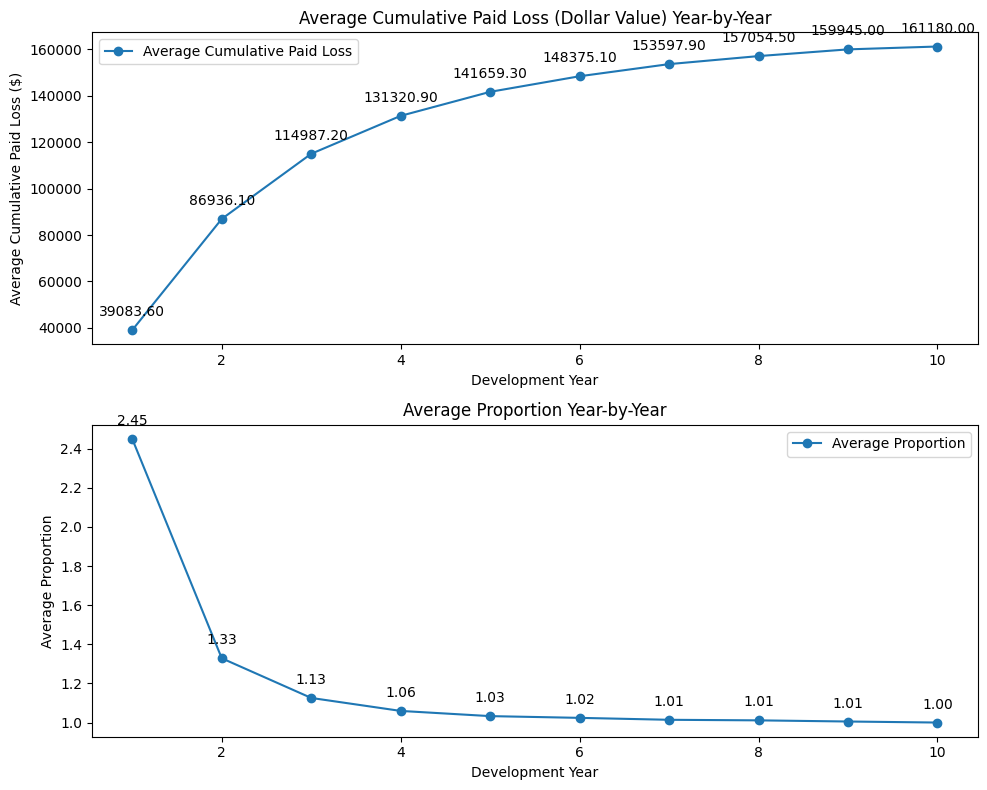

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ... (previous code to calculate runoff_triangle and normalized_triangle)

# Calculate column-wise averages for both triangles
runoff_avg = runoff_triangle.mean()
normalized_avg = normalized_triangle.mean()

# Create DataFrames for the averages
runoff_avg_df = pd.DataFrame({'DevelopmentYear': runoff_avg.index, 'AverageCumPaidLoss_D': runoff_avg.values})
normalized_avg_df = pd.DataFrame({'DevelopmentYear': normalized_avg.index, 'AverageProportion': normalized_avg.values})

# Create a figure and axis for the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the average Cumulative Paid Loss (Dollar Value)
ax[0].set_title("Average Cumulative Paid Loss (Dollar Value) Year-by-Year")
ax[0].set_xlabel("Development Year")
ax[0].set_ylabel("Average Cumulative Paid Loss ($)")
line1, = ax[0].plot(runoff_avg_df['DevelopmentYear'], runoff_avg_df['AverageCumPaidLoss_D'], marker='o', label="Average Cumulative Paid Loss")

# Plot the average Proportion
ax[1].set_title("Average Proportion Year-by-Year")
ax[1].set_xlabel("Development Year")
ax[1].set_ylabel("Average Proportion")
line2, = ax[1].plot(normalized_avg_df['DevelopmentYear'], normalized_avg_df['AverageProportion'], marker='o', label="Average Proportion")

# Add legends
ax[0].legend(loc='best')
ax[1].legend(loc='best')

# Add annotations with values for the Average Cumulative Paid Loss
for line, df in zip([line1, line2], [runoff_avg_df, normalized_avg_df]):
    for i, txt in enumerate(df['AverageCumPaidLoss_D'] if line == line1 else df['AverageProportion']):
        ax[0].annotate(f'{txt:.2f}', (df['DevelopmentYear'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center')

# Add annotations with values for the Average Proportion
for i, txt in enumerate(normalized_avg_df['AverageProportion']):
    ax[1].annotate(f'{txt:.2f}', (normalized_avg_df['DevelopmentYear'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



These two graphs show the average change in the cumulative losses for the company Allstate Ins Co Grp. For instance, the claims reported for the second year after an accident are, on average, 2.45 times the ones reported on the first year. Taking this into consideration, if for a year the company has losses for 100 dollars, it can expect cumulative losses to sum 245 dollars for the next year (meaning an additional 145 dollars were reported on the second year).

## Building the Run Off Triangles for All Companies

Let´s apply the previous logic for all companies. This code will create two csv files that have the run-off tables (in dollar amounts and normalized) for ALL companies:

In [15]:
import pandas as pd
import numpy as np
import os


# Get a list of unique company names (GRNAME)
company_names = wkcomp['GRNAME'].unique()

# Create two empty DataFrames to store the combined runoff tables
combined_runoff_tables = pd.DataFrame()
combined_normalized_tables = pd.DataFrame()

# Loop through each company and create runoff tables
for company_name in company_names:
    # Filter data for the current company and specific accident years
    filtered_data = wkcomp[(wkcomp['GRNAME'] == company_name) & (wkcomp['AccidentYear'] >= 1988) & (wkcomp['AccidentYear'] <= 1997)]

    # Create an empty matrix (runoff triangle)
    development_years = np.arange(1, 11)  # Development lags 1 to 10
    accident_years = np.arange(1988, 1998)  # Accident years 1988 to 1997
    runoff_triangle = pd.DataFrame(index=accident_years, columns=development_years)

    # Fill in the matrix with 'CumPaidLoss_D' values
    for acc_year in accident_years:
        for dev_year in development_years:
            # Find the corresponding row in the filtered data
            row = filtered_data[(filtered_data['DevelopmentYear'] == (acc_year + dev_year - 1)) & (filtered_data['AccidentYear'] == acc_year)]

            # Get the 'CumPaidLoss_D' value, or 0 if no matching data
            if not row.empty:
                value = row['CumPaidLoss_D'].values[0]
            else:
                value = 0

            # Fill in the matrix
            runoff_triangle.at[acc_year, dev_year] = value

    # Create a copy of the runoff triangle for normalization
    normalized_triangle = runoff_triangle.copy()

    # Calculate proportions
    for acc_year in range(1988, 1998):
        for dev_year in range(1, 10):
            normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]

    # Set all values in column 10 to 1.0
    normalized_triangle[10] = 1.0

    # Add a column for company name
    runoff_triangle['Company'] = company_name
    normalized_triangle['Company'] = company_name

    # Add the tables for the current company to the combined tables
    combined_runoff_tables = pd.concat([combined_runoff_tables, runoff_triangle], axis=0)
    combined_normalized_tables = pd.concat([combined_normalized_tables, normalized_triangle], axis=0)

# Save the combined tables as CSV files
combined_runoff_tables.to_csv('/content/drive/My Drive/Combined_RunoffTables_WithCompany.csv')
combined_normalized_tables.to_csv('/content/drive/My Drive/Combined_NormalizedTables_WithCompany.csv')

print("Combined runoff tables with company names saved successfully.")




<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: invalid value encountered in long_scalars
  normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]
<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: divide by zero encountered in long_scalars
  normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]
<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: invalid value encountered in long_scalars
  normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]
<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: divide by zero encountered in long_scalars
  normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]
<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: invalid value encountered in long_scalars
  no

Combined runoff tables with company names saved successfully.


<ipython-input-15-45e86ee586b0>:44: RuntimeWarning: invalid value encountered in long_scalars
  normalized_triangle.at[acc_year, dev_year] = runoff_triangle.at[acc_year, dev_year + 1] / runoff_triangle.at[acc_year, dev_year]


Let´s load these new files:

In [16]:
# Uploading the File
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Define the file paths for the new CSV files
normalized_file_path = '/content/drive/MyDrive/Combined_NormalizedTables_WithCompany.csv'
runoff_file_path = '/content/drive/MyDrive/Combined_RunoffTables_WithCompany.csv'

# Read the normalized CSV file into a DataFrame
normalized_tables = pd.read_csv(normalized_file_path)

# Read the runoff CSV file into a DataFrame
runoff_tables = pd.read_csv(runoff_file_path)

# Assuming normalized_tables and runoff_tables are your DataFrames

# Define the new column titles
new_column_titles = [
    "AccidentYear",
    "DevelopmentLag1",
    "DevelopmentLag2",
    "DevelopmentLag3",
    "DevelopmentLag4",
    "DevelopmentLag5",
    "DevelopmentLag6",
    "DevelopmentLag7",
    "DevelopmentLag8",
    "DevelopmentLag9",
    "DevelopmentLag10",
    "Company"
]

# Update the column titles in both DataFrames
normalized_tables.columns = new_column_titles
runoff_tables.columns = new_column_titles
# Replace NaN, null, and "inf" with 0 in the normalized_tables DataFrame
normalized_tables = normalized_tables.fillna(0).replace([np.inf, -np.inf], 0)


# Assuming normalized_tables and runoff_tables are your DataFrames with updated column titles

# Print the first few lines of normalized_tables
print("Normalized Tables:")
print(normalized_tables.head())

# Print the first few lines of runoff_tables
print("\nRunoff Tables:")
print(runoff_tables.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Normalized Tables:
   AccidentYear  DevelopmentLag1  DevelopmentLag2  DevelopmentLag3  \
0          1988         2.209194         1.415888         1.139759   
1          1989         2.050385         1.312905         1.179751   
2          1990         2.553367         1.337962         1.145693   
3          1991         2.158830         1.325979         1.158381   
4          1992         2.247331         1.269758         1.165497   

   DevelopmentLag4  DevelopmentLag5  DevelopmentLag6  DevelopmentLag7  \
0         1.089672         1.049315         1.037622         1.021354   
1         1.095045         1.057555         1.040069         1.060898   
2         1.086827         1.048368         1.087563         1.013622   
3         1.083789         1.100912         1.019256         1.026355   
4         1.160590         1.033259         1.028320         1.013

In [17]:
import numpy as np
from tabulate import tabulate

# Define a custom aggregation function to calculate the average excluding zeros
def custom_mean(x):
    non_zero_values = x[x != 0]
    if not non_zero_values.empty:
        return non_zero_values.mean()
    else:
        return np.nan

# Calculate the average of the normalized tables across all companies, grouping by AccidentYear
average_normalized_table = normalized_tables.groupby('AccidentYear').agg(custom_mean).reset_index()

# Calculate the average of the runoff tables across all companies, grouping by AccidentYear
average_runoff_table = runoff_tables.groupby('AccidentYear').mean().reset_index()

# Rename the first column to "AccidentYear 1988 to 1997"
average_normalized_table.rename(columns={average_normalized_table.columns[0]: "AccidentYear 1988 to 1997"}, inplace=True)
average_runoff_table.rename(columns={average_runoff_table.columns[0]: "AccidentYear 1988 to 1997"}, inplace=True)

# Print the average tables using tabulate for better formatting
print("Average Normalized Table:")
print(tabulate(average_normalized_table, headers='keys', tablefmt='fancy_grid', showindex=False))

print("\nAverage Runoff Table:")
print(tabulate(average_runoff_table, headers='keys', tablefmt='fancy_grid', showindex=False))





Average Normalized Table:
╒═════════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╕
│   AccidentYear 1988 to 1997 │   DevelopmentLag1 │   DevelopmentLag2 │   DevelopmentLag3 │   DevelopmentLag4 │   DevelopmentLag5 │   DevelopmentLag6 │   DevelopmentLag7 │   DevelopmentLag8 │   DevelopmentLag9 │   DevelopmentLag10 │
╞═════════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪════════════════════╡
│                        1988 │           2.30522 │           1.33962 │           1.12911 │           1.10496 │           1.04981 │          1.03304  │          1.06719  │          1.01462  │          1.00738  │                  1 │
├─────────────────────────────┼───────────

<ipython-input-17-8c53a0ed3fef>:13: FutureWarning: ['Company'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  average_normalized_table = normalized_tables.groupby('AccidentYear').agg(custom_mean).reset_index()
<ipython-input-17-8c53a0ed3fef>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_runoff_table = runoff_tables.groupby('AccidentYear').mean().reset_index()


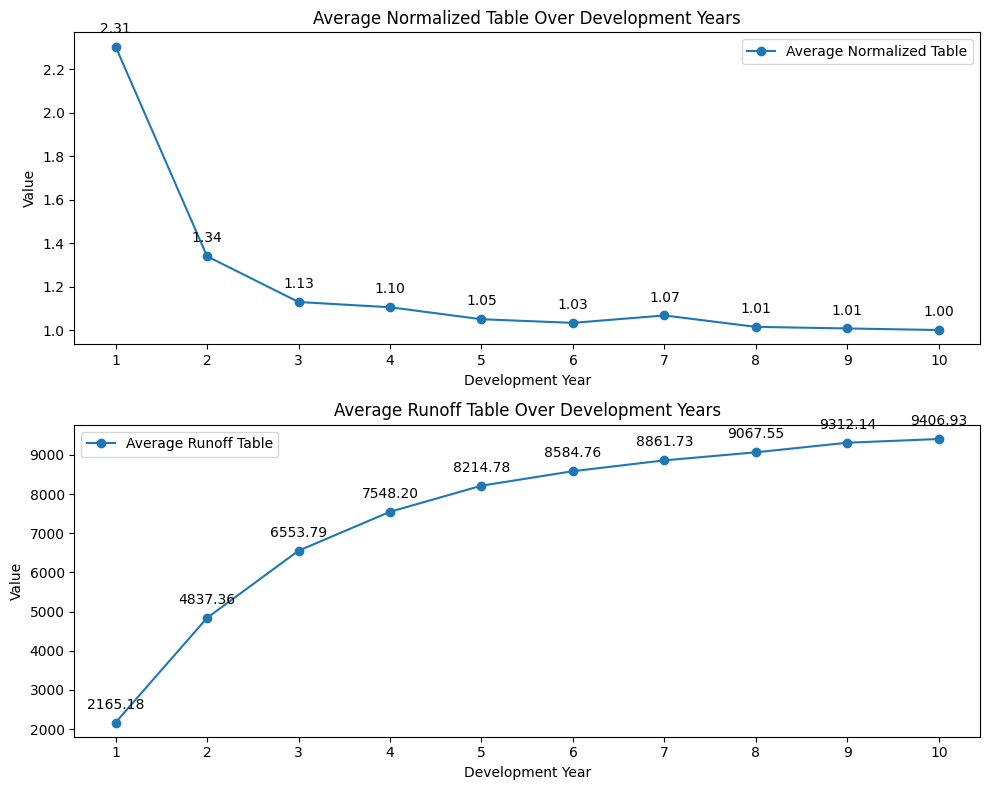

In [18]:
import matplotlib.pyplot as plt

# Manually set the development years (x-axis values)
development_years = list(range(1, 11))  # Development lags 1 to 10

# Extract the average values for each development year
average_normalized_values = average_normalized_table.iloc[0, 1:].values
average_runoff_values = average_runoff_table.iloc[0, 1:].values

# Create a figure and axis for the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the Average Normalized Table
ax1.set_title("Average Normalized Table Over Development Years")
ax1.set_xlabel("Development Year")
ax1.set_ylabel("Value")
ax1.plot(development_years, average_normalized_values, marker='o', label="Average Normalized Table")

# Add labels on each data point for Average Normalized Table
for x, y in zip(development_years, average_normalized_values):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the Average Runoff Table
ax2.set_title("Average Runoff Table Over Development Years")
ax2.set_xlabel("Development Year")
ax2.set_ylabel("Value")
ax2.plot(development_years, average_runoff_values, marker='o', label="Average Runoff Table")

# Add labels on each data point for Average Runoff Table
for x, y in zip(development_years, average_runoff_values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust the x-axis labels
ax1.set_xticks(development_years)
ax1.set_xticklabels([str(year) for year in development_years])

ax2.set_xticks(development_years)
ax2.set_xticklabels([str(year) for year in development_years])

# Add a legend to each plot
ax1.legend()
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



<ipython-input-19-833b4750fe32>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_normalized_table = normalized_tables.groupby('AccidentYear').var().reset_index()


Variance Normalized Table:
╒═════════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╕
│   AccidentYear 1988 to 1997 │   DevelopmentLag1 │   DevelopmentLag2 │   DevelopmentLag3 │   DevelopmentLag4 │   DevelopmentLag5 │   DevelopmentLag6 │   DevelopmentLag7 │   DevelopmentLag8 │   DevelopmentLag9 │   DevelopmentLag10 │
╞═════════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪════════════════════╡
│                        1988 │           1.84426 │          0.561616 │          0.31789  │          0.330316 │          0.27053  │          0.263163 │          0.340506 │          0.249624 │          0.245945 │                  0 │
├─────────────────────────────┼──────────

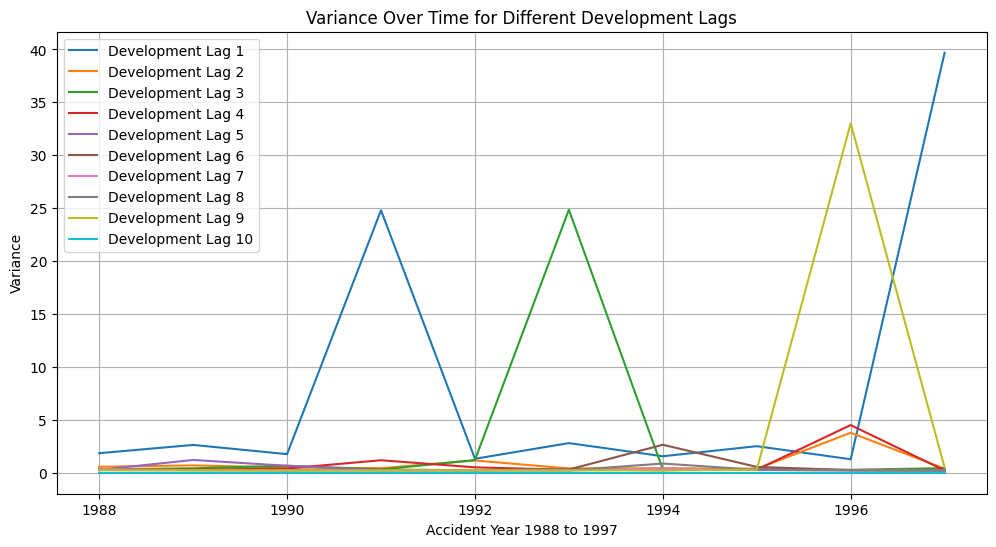

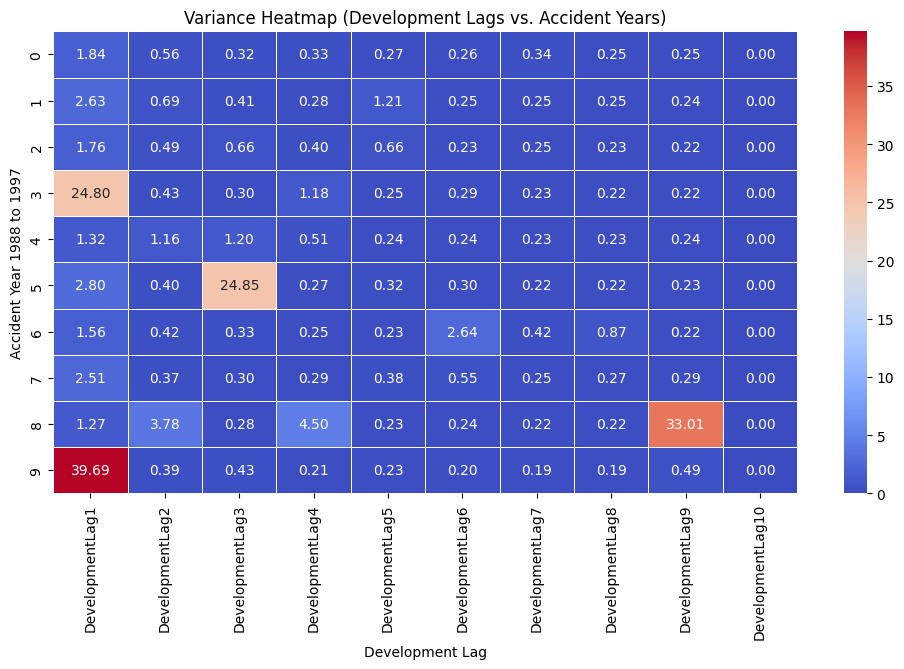

Variance Summary Table:
╒═══════════════════════════╤═════════╤═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ Development Lag           │   count │        mean │        std │         min │         25% │         50% │         75% │         max │
╞═══════════════════════════╪═════════╪═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ AccidentYear 1988 to 1997 │      10 │ 1992.5      │  3.02765   │ 1988        │ 1990.25     │ 1992.5      │ 1994.75     │ 1997        │
├───────────────────────────┼─────────┼─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ DevelopmentLag1           │      10 │    8.01662  │ 13.2522    │    1.27301  │    1.60688  │    2.17621  │    2.75601  │   39.6872   │
├───────────────────────────┼─────────┼─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ DevelopmentLag2

In [19]:
# Calculate the variance of the normalized tables across all companies, grouping by AccidentYear
variance_normalized_table = normalized_tables.groupby('AccidentYear').var().reset_index()



# Rename the first column to "AccidentYear 1988 to 1997"
variance_normalized_table.rename(columns={variance_normalized_table.columns[0]: "AccidentYear 1988 to 1997"}, inplace=True)


# Print the variance tables using tabulate for better formatting
print("Variance Normalized Table:")
print(tabulate(variance_normalized_table, headers='keys', tablefmt='fancy_grid', showindex=False))

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Line Plot of Variance Over Time
plt.figure(figsize=(12, 6))
for lag in range(1, 11):
    plt.plot(variance_normalized_table['AccidentYear 1988 to 1997'], variance_normalized_table[f'DevelopmentLag{lag}'], label=f'Development Lag {lag}')

plt.title('Variance Over Time for Different Development Lags')
plt.xlabel('Accident Year 1988 to 1997')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

# 2. Heatmap
plt.figure(figsize=(12, 6))
heatmap_data = variance_normalized_table.iloc[:, 1:]
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Variance Heatmap (Development Lags vs. Accident Years)')
plt.xlabel('Development Lag')
plt.ylabel('Accident Year 1988 to 1997')
plt.show()

# 3. Variance Summary Table
variance_summary = variance_normalized_table.describe().transpose()
variance_summary.reset_index(inplace=True)
variance_summary.rename(columns={'index': 'Development Lag'}, inplace=True)
print("Variance Summary Table:")
print(tabulate(variance_summary, headers='keys', tablefmt='fancy_grid', showindex=False))




Identified Outliers:
╒════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╤══════════════════════════════╕
│   AccidentYear │   DevelopmentLag1 │   DevelopmentLag2 │   DevelopmentLag3 │   DevelopmentLag4 │   DevelopmentLag5 │   DevelopmentLag6 │   DevelopmentLag7 │   DevelopmentLag8 │   DevelopmentLag9 │   DevelopmentLag10 │ Company                      │
╞════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪════════════════════╪══════════════════════════════╡
│           1997 │           7.82465 │           1.26876 │           1.28363 │          1.05973  │          0.944486 │          0.995816 │           1.2525  │           1.01174 │          1.012    │                  1 │ Americ

<ipython-input-20-1d8f7aac8f82>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers_dlag1_year9)
<ipython-input-20-1d8f7aac8f82>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers_dlag3_year5)
<ipython-input-20-1d8f7aac8f82>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers_dlag9_year8)


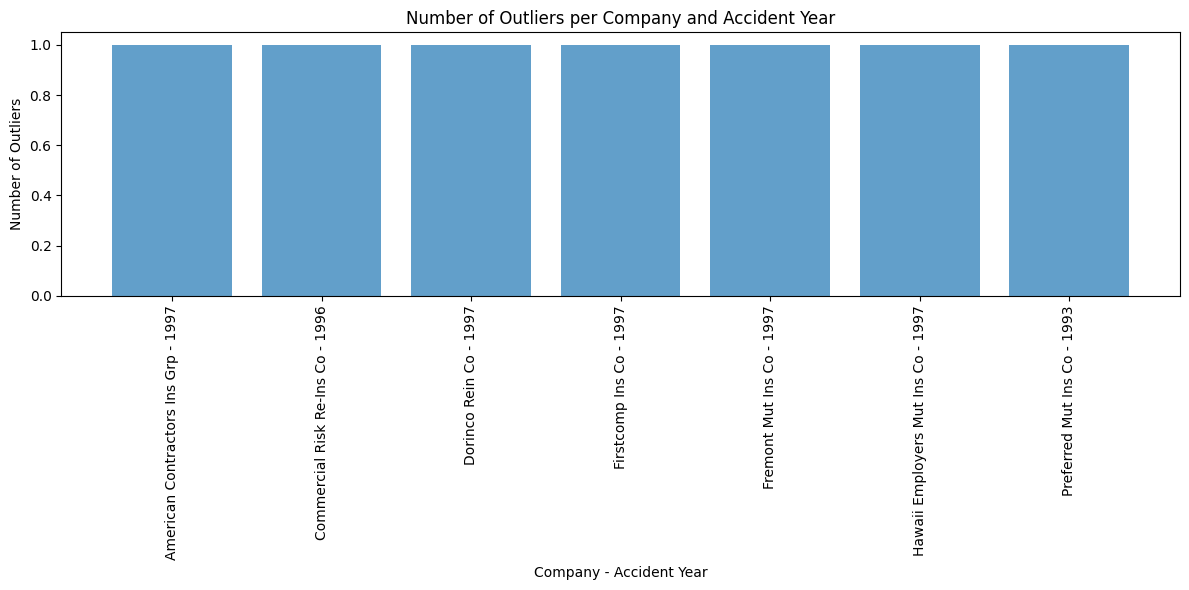

In [20]:
from tabulate import tabulate

# Define a threshold for identifying outliers
threshold = 5.0  # Adjust this threshold as needed

# Create a DataFrame to store outliers
outliers_df = pd.DataFrame(columns=new_column_titles)

# Identify and add outliers for DevelopmentLag1 at Accident Year 9 (1997)
outliers_dlag1_year9 = normalized_tables[
    (normalized_tables["AccidentYear"] == 1997)
    & (normalized_tables["DevelopmentLag1"] > threshold)
]
outliers_df = outliers_df.append(outliers_dlag1_year9)

# Identify and add outliers for DevelopmentLag3 at Accident Year 5 (1993)
outliers_dlag3_year5 = normalized_tables[
    (normalized_tables["AccidentYear"] == 1993)
    & (normalized_tables["DevelopmentLag3"] > threshold)
]
outliers_df = outliers_df.append(outliers_dlag3_year5)

# Identify and add outliers for DevelopmentLag9 at Accident Year 8 (1996)
outliers_dlag9_year8 = normalized_tables[
    (normalized_tables["AccidentYear"] == 1996)
    & (normalized_tables["DevelopmentLag9"] > threshold)
]
outliers_df = outliers_df.append(outliers_dlag9_year8)

# Print the identified outliers using tabulate for better formatting
print("Identified Outliers:")
print(tabulate(outliers_df, headers='keys', tablefmt='fancy_grid', showindex=False))


import matplotlib.pyplot as plt

# Group the outliers DataFrame by Company and AccidentYear and count the outliers
outliers_count = outliers_df.groupby(['Company', 'AccidentYear']).size().reset_index(name='OutlierCount')

# Create a bar chart to visualize the number of outliers per year and company
plt.figure(figsize=(12, 6))
plt.bar(range(len(outliers_count)), outliers_count['OutlierCount'], align='center', alpha=0.7)
plt.xticks(range(len(outliers_count)), [f"{company} - {year}" for company, year in zip(outliers_count['Company'], outliers_count['AccidentYear'])], rotation=90)
plt.xlabel('Company - Accident Year')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Company and Accident Year')
plt.tight_layout()
plt.show()



Cleaning the data:

In [21]:
import pandas as pd
import numpy as np

# Load the data
normalized_tables = pd.read_csv('/content/drive/MyDrive/Combined_NormalizedTables_WithCompany.csv')

# Replace empty strings with NaN
normalized_tables.replace("", np.nan, inplace=True)

# Drop rows with any NaN values
normalized_tables.dropna(inplace=True)

# Drop rows containing 'inf'
normalized_tables = normalized_tables[~normalized_tables.isin([np.inf, -np.inf]).any(1)]

# Drop rows with 8 or more zeros
normalized_tables = normalized_tables[normalized_tables.iloc[:, :-1].apply(lambda row: (row == 0).sum(), axis=1) < 8]

# Save the cleaned data back to a CSV
normalized_tables.to_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompany.csv', index=False)


#########################

import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompany.csv')

# Get the count of each company
company_counts = data['Company'].value_counts()

# Filter companies that have exactly 10 rows
valid_companies = company_counts[company_counts == 10].index

# Keep only the rows with valid companies
filtered_data = data[data['Company'].isin(valid_companies)]

# Save the filtered DataFrame to a new CSV file
filtered_data.to_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompleteTriangles.csv', index=False)


<ipython-input-21-5ec36ff2c565>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  normalized_tables = normalized_tables[~normalized_tables.isin([np.inf, -np.inf]).any(1)]


Let´s make the csv only to have the upper triangles

In [22]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompleteTriangles.csv')

# Function to keep only the upper left triangle of the matrix
def upper_left_triangle(group):
    n = len(group)
    for i in range(n):
        group.iloc[i, -i-1:-1] = np.nan  # Set the lower right triangle values to NaN
    return group

# Apply the function to each company's triangle
data = data.groupby('Company').apply(upper_left_triangle).reset_index(drop=True)

# Save the modified data back to a CSV
data.to_csv('/content/drive/MyDrive/UpperLeftTriangle_NormalizedTables_WithCompany.csv', index=False)



<ipython-input-22-35dd9f0d832b>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('Company').apply(upper_left_triangle).reset_index(drop=True)


## Modeling

#### Deterministic way of finding triangles

In [23]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/UpperLeftTriangle_NormalizedTables_WithCompany.csv')

def fill_triangle(group):
    # For each column starting from the second one
    for col in group.columns[1:-1]:  # Exclude 'Unnamed: 0' and 'Company'
        while group[col].isna().any():  # While there are missing values in the column
            avg = group[col].mean()  # Calculate the average of the known values
            group[col].fillna(avg, limit=1, inplace=True)  # Fill the first missing value
    return group

# Apply the function to each company's triangle
completed_data = data.groupby('Company').apply(fill_triangle).reset_index(drop=True)

# Save the completed data back to a CSV
completed_data.to_csv('/content/drive/MyDrive/CompletedTriangle_NormalizedTables_WithCompany.csv', index=False)


<ipython-input-23-cf56fb7198ff>:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  completed_data = data.groupby('Company').apply(fill_triangle).reset_index(drop=True)


#### Finding Errors

                                Company       MSE      MAPE
0                   Allstate Ins Co Grp  0.001467  2.126313
1                    California Cas Grp  0.000176  0.632878
2                        Celina Mut Grp  0.003799  1.936331
3                    Federal Ins Co Grp  0.000187  0.678348
4                 Farm Bureau Of MI Grp  0.000134  0.524865
5                 West Bend Mut Ins Grp  0.000029  0.222140
6                         Secura Ins Co  0.000093  0.483251
7                    Island Ins Cos Grp  0.000597  0.954828
8                       Penn Miller Grp  0.000554  0.923903
9                Farmers Automobile Grp  0.000063  0.395310
10                   State Farm Mut Grp  0.000063  0.363732
11                Erie Ins Exchange Grp  0.000072  0.424800
12            Pennsylvania Natl Ins Grp  0.000207  0.770366
13               Preferred Risk Mut Grp  0.000178  0.573906
14               NC Farm Bureau Ins Grp  0.001140  1.705430
15                     Grinnell Mut Grp 

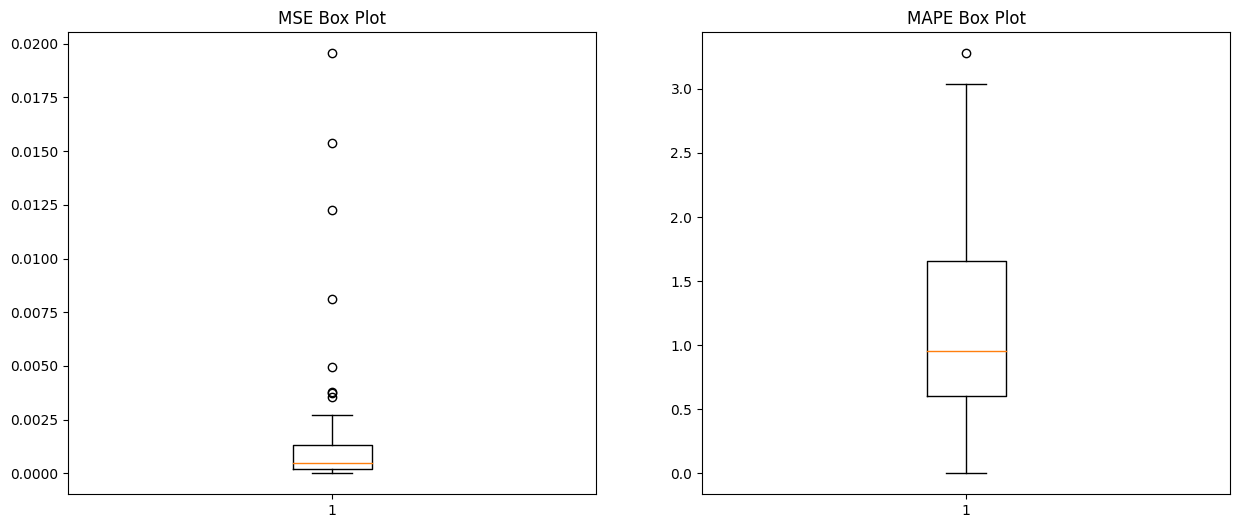

Average MSE: 0.001707069754863542
Variance MSE: 1.294925792192001e-05
Average MAPE: 1.1725048485530711
Variance MAPE: 0.6080405247053662


In [24]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the real data
real_data = pd.read_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompleteTriangles.csv')
estimated_data = pd.read_csv('/content/drive/MyDrive/CompletedTriangle_NormalizedTables_WithCompany.csv')

mse_list = []
mape_list = []
companies = estimated_data['Company'].unique()

for company in companies:
    real_triangle = real_data[real_data['Company'] == company].iloc[:, 1:-1].values
    estimated_triangle = estimated_data[estimated_data['Company'] == company].iloc[:, 1:-1].values

    # Mask to get only the values below the main diagonal
    mask = np.tril(np.ones_like(real_triangle, dtype=bool), k=-1)

    # Apply the mask to get the values below the main diagonal
    real_triangle_lower = real_triangle[mask]
    estimated_triangle_lower = estimated_triangle[mask]

    # Calculate MSE
    mse = mean_squared_error(real_triangle_lower, estimated_triangle_lower)
    mse_list.append(mse)

    # Calculate MAPE
    mape = np.mean(np.abs((real_triangle_lower - estimated_triangle_lower) / real_triangle_lower)) * 100
    mape_list.append(mape)

# Tabulate the results
results = pd.DataFrame({
    'Company': companies,
    'MSE': mse_list,
    'MAPE': mape_list
})

print(results)

# Box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].boxplot(mse_list)
ax[0].set_title('MSE Box Plot')
ax[1].boxplot(mape_list)
ax[1].set_title('MAPE Box Plot')
plt.show()

# Calculate average and variance
avg_mse = np.mean(mse_list)
var_mse = np.var(mse_list)
avg_mape = np.mean(mape_list)
var_mape = np.var(mape_list)

print(f"Average MSE: {avg_mse}")
print(f"Variance MSE: {var_mse}")
print(f"Average MAPE: {avg_mape}")
print(f"Variance MAPE: {var_mape}")



## Building the OLS Model

Let´s first build the design matrix for a 10x10 triangle:

In [25]:
import pandas as pd

# Number of rows and columns
n = 10

# Create an empty dataframe with the desired columns
columns = ['intercept'] + [f'alpha_{i}' for i in range(2, n+1)] + [f'beta_{i}' for i in range(2, n+1)]
design_matrix = pd.DataFrame(0, index=[f'y_{i}{j-i+1}' for i in range(1, n+1) for j in range(i, n+1)], columns=columns)

# Populate the dataframe
for row in design_matrix.index:
    i, j = int(row[2]), int(row[3:])
    design_matrix.at[row, 'intercept'] = 1
    if i > 1:
        design_matrix.at[row, f'alpha_{i}'] = 1
    if j > 1 and j != i:  # Add a condition to check if j is not equal to i
        design_matrix.at[row, f'beta_{j}'] = 1

print(design_matrix)











       intercept  alpha_2  alpha_3  alpha_4  alpha_5  alpha_6  alpha_7  \
y_11           1        0        0        0        0        0        0   
y_12           1        0        0        0        0        0        0   
y_13           1        0        0        0        0        0        0   
y_14           1        0        0        0        0        0        0   
y_15           1        0        0        0        0        0        0   
y_16           1        0        0        0        0        0        0   
y_17           1        0        0        0        0        0        0   
y_18           1        0        0        0        0        0        0   
y_19           1        0        0        0        0        0        0   
y_110          1        0        0        0        0        0        0   
y_21           1        1        0        0        0        0        0   
y_22           1        1        0        0        0        0        0   
y_23           1        1        0    

Using this design matrix, let´s now run an OLS model for the first company (i.e. the first triangle).

For this, we will use the upper half of the triangle, and take the log of its values. Then, we will convert all the values into a vector, and finally run the regression against the design matrix.

In [26]:
import numpy as np
import statsmodels.api as sm

data = data[data['Company'] != 'Sirius Amer Ins Co']
# Assuming the first triangle is represented by the first unique company in the dataset
company = data['Company'].unique()[0]
triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values
print(triangle_data)
# Take the natural logarithm of the triangle data
log_triangle_data = np.log(triangle_data)
print(log_triangle_data)
# Flatten the log triangle to get the y values
y_values = log_triangle_data[~np.isnan(log_triangle_data)]
print(y_values)
# Ensure that the design_matrix and y_values are of the same length
if len(y_values) != len(design_matrix):
    raise ValueError("Mismatch between the number of y_values and rows in the design matrix.")

# Fit the linear regression model
model = sm.OLS(y_values, design_matrix).fit()

# Display the results
print(model.summary())



[[2.20919358 1.41588788 1.13975918 1.08967189 1.04931499 1.03762219
  1.02135351 1.05554772 1.01091955 1.        ]
 [2.05038544 1.31290538 1.17975126 1.09504455 1.0575552  1.04006946
  1.06089795 1.01412284 1.01351356        nan]
 [2.55336665 1.33796206 1.14569277 1.08682658 1.04836786 1.08756332
  1.01362217 1.01704908        nan        nan]
 [2.15882998 1.32597949 1.15838109 1.0837888  1.10091244 1.01925634
  1.02635507        nan        nan        nan]
 [2.24733065 1.26975844 1.16549681 1.16059036 1.03325948 1.02832046
         nan        nan        nan        nan]
 [2.39206848 1.31082598 1.37458205 1.02486516 1.01590323        nan
         nan        nan        nan        nan]
 [2.29515678 1.89502491 1.0275396  1.01653546        nan        nan
         nan        nan        nan        nan]
 [4.51652804 1.03068042 1.0216353         nan        nan        nan
         nan        nan        nan        nan]
 [1.05414349 1.04597471        nan        nan        nan        nan
         nan

Having the coefficients, we can use this model to predict a complete triangle for the company:

In [27]:
# Extract the coefficients from the model
intercept = model.params[0]
alphas = model.params[1:10]  # alpha_2 to alpha_10
betas = model.params[10:]    # beta_2 to beta_10

# Initialize a copy of the log triangle to fill in the missing values
predicted_log_triangle = log_triangle_data.copy()

# Iterate over the triangle to fill in missing values
for i in range(predicted_log_triangle.shape[0]):
    for j in range(predicted_log_triangle.shape[1]):
        if np.isnan(predicted_log_triangle[i, j]):
            # Compute the predicted value using the model's coefficients
            predicted_value = intercept
            if i > 0:  # Add alpha_i if i > 0
                predicted_value += alphas[i-1]
            if j > 0:  # Add beta_j if j > 0
                predicted_value += betas[j-1]
            predicted_log_triangle[i, j] = predicted_value


# Exponentiate the predicted_log_triangle to get Z_ij
Z_ij = np.exp(predicted_log_triangle)

print(Z_ij)






[[2.20919358 1.41588788 1.13975918 1.08967189 1.04931499 1.03762219
  1.02135351 1.05554772 1.01091955 1.        ]
 [2.05038544 1.31290538 1.17975126 1.09504455 1.0575552  1.04006946
  1.06089795 1.01412284 1.01351356 0.91049065]
 [2.55336665 1.33796206 1.14569277 1.08682658 1.04836786 1.08756332
  1.01362217 1.01704908 0.96073707 0.90566839]
 [2.15882998 1.32597949 1.15838109 1.0837888  1.10091244 1.01925634
  1.02635507 0.95984019 0.92813764 0.87493754]
 [2.24733065 1.26975844 1.16549681 1.16059036 1.03325948 1.02832046
  0.97196206 0.95371975 0.92221935 0.86935848]
 [2.39206848 1.31082598 1.37458205 1.02486516 1.01590323 1.14338117
  1.11720269 1.09623443 1.06002691 0.99926702]
 [2.29515678 1.89502491 1.0275396  1.01653546 1.16156375 1.18104826
  1.15400737 1.13234834 1.09494802 1.03218648]
 [4.51652804 1.03068042 1.0216353  1.25175439 1.24277325 1.26361999
  1.23468857 1.21151527 1.17150014 1.1043507 ]
 [1.05414349 1.04597471 0.72268902 0.6900836  0.68513235 0.69662502
  0.68067532

#### Creating estimated triangles for all companies using this model:

Creating a csv file with the triangles filled by this model: We will use this same logic but will do the process with every company:

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
data = pd.read_csv('/content/drive/MyDrive/UpperLeftTriangle_NormalizedTables_WithCompany.csv')

# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']


# Create an empty DataFrame to store all estimated triangles
all_estimated_triangles = pd.DataFrame()

for company in data['Company'].unique():
    triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values

    # Take the natural logarithm of the triangle data
    log_triangle_data = np.log(triangle_data)

    # Flatten the log triangle to get the y values
    y_values = log_triangle_data[~np.isnan(log_triangle_data)]

    # Ensure that the design_matrix and y_values are of the same length
    if len(y_values) != len(design_matrix):
        raise ValueError(f"Mismatch between the number of y_values and rows in the design matrix for company {company}.")

    # Fit the linear regression model
    model = sm.OLS(y_values, design_matrix).fit()

    # Extract the coefficients from the model
    intercept = model.params[0]
    alphas = model.params[1:10]  # alpha_2 to alpha_10
    betas = model.params[10:]    # beta_2 to beta_10

    # Initialize a copy of the log triangle to fill in the missing values
    predicted_log_triangle = log_triangle_data.copy()

    # Iterate over the triangle to fill in missing values
    for i in range(predicted_log_triangle.shape[0]):
        for j in range(predicted_log_triangle.shape[1]):
            if np.isnan(predicted_log_triangle[i, j]):
                # Compute the predicted value using the model's coefficients
                predicted_value = intercept
                if i > 0:  # Add alpha_i if i > 0
                    predicted_value += alphas[i-1]
                if j > 0:  # Add beta_j if j > 0
                    predicted_value += betas[j-1]
                predicted_log_triangle[i, j] = predicted_value

    # Exponentiate the predicted_log_triangle to get Z_ij
    Z_ij = np.exp(predicted_log_triangle)

    # Convert the estimated triangle to a DataFrame and append to the main DataFrame
    estimated_triangle_df = pd.DataFrame(Z_ij)
    estimated_triangle_df['Company'] = company
    all_estimated_triangles = all_estimated_triangles.append(estimated_triangle_df)

# Save the estimated triangles to a CSV file
all_estimated_triangles.to_csv('/content/drive/MyDrive/estimated2_data.csv', index=False)
estimated2_data = pd.read_csv('/content/drive/MyDrive/estimated2_data.csv')

# Create the repeating years list
years = list(range(1988, 1998)) * (len(estimated2_data) // 10)

# Add the years list as a new column to the beginning of the DataFrame
estimated2_data.insert(0, 'Unnamed: 0', years)

# Save the updated DataFrame back to the CSV file
estimated2_data.to_csv('/content/drive/MyDrive/estimated2_data.csv', index=False)




<ipython-input-28-dadb2486bbbf>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_estimated_triangles = all_estimated_triangles.append(estimated_triangle_df)
<ipython-input-28-dadb2486bbbf>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_estimated_triangles = all_estimated_triangles.append(estimated_triangle_df)
<ipython-input-28-dadb2486bbbf>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_estimated_triangles = all_estimated_triangles.append(estimated_triangle_df)
<ipython-input-28-dadb2486bbbf>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_estimated_triangles = all_estimated_triangles.append(estimated_triangle_

Evaluating the Model Against original data: We will measure the estimated triangle with the OLS model according to the data of each company. In other words, we will use the upper triangle data to estimate the lower triangle for each company.

                                Company       MSE       MAPE
0                   Allstate Ins Co Grp  0.022389   9.047234
1                    California Cas Grp  0.002321   2.719481
2                        Celina Mut Grp  0.006866   3.503397
3                    Federal Ins Co Grp  0.000763   1.319748
4                 Farm Bureau Of MI Grp  0.002404   2.619058
5                 West Bend Mut Ins Grp  0.003235   3.388175
6                         Secura Ins Co  0.002182   2.531786
7                    Island Ins Cos Grp  0.007210   4.285938
8                       Penn Miller Grp  0.005511   4.016907
9                Farmers Automobile Grp  0.001888   2.469846
10                   State Farm Mut Grp  0.001515   2.370190
11                Erie Ins Exchange Grp  0.001858   2.583542
12            Pennsylvania Natl Ins Grp  0.005449   4.288741
13               Preferred Risk Mut Grp  0.001167   1.937192
14               NC Farm Bureau Ins Grp  0.002200   2.444332
15                     G

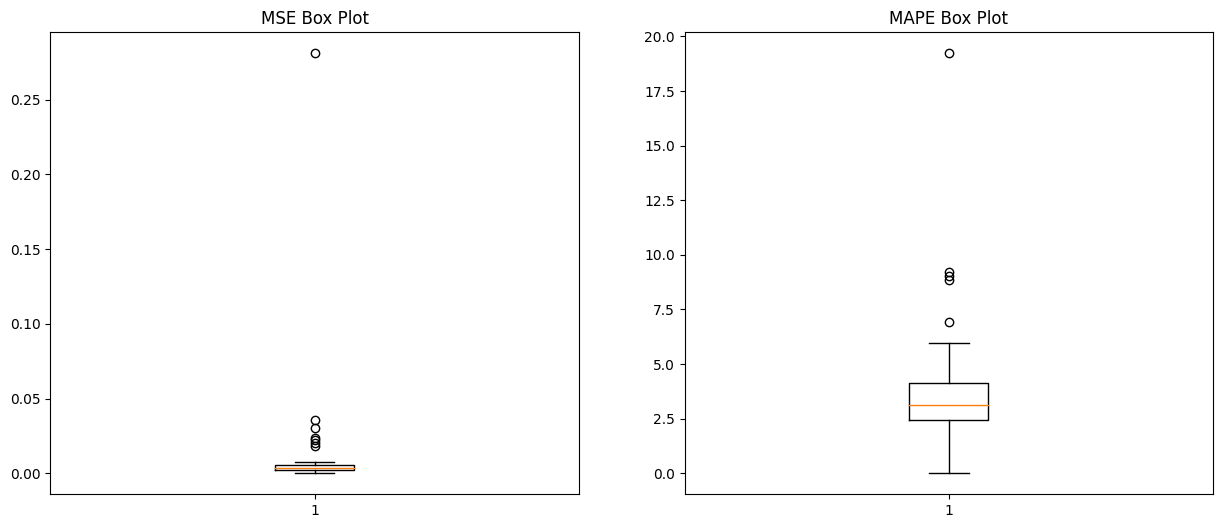

Average MSE: 0.010348775544435578
Variance MSE: 0.0013361851996427751
Average MAPE: 3.677467234763157
Variance MAPE: 7.43118221456938


In [29]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the real data
real_data = pd.read_csv('/content/drive/MyDrive/Cleaned_NormalizedTables_WithCompleteTriangles.csv')
estimated_data = pd.read_csv('/content/drive/MyDrive/estimated2_data.csv')

mse_list = []
mape_list = []
companies = estimated_data['Company'].unique()

for company in companies:
    real_triangle = real_data[real_data['Company'] == company].iloc[:, 1:-1].values
    estimated_triangle = estimated_data[estimated_data['Company'] == company].iloc[:, 1:-1].values

    # Mask to get only the values below the main diagonal
    mask = np.tril(np.ones_like(real_triangle, dtype=bool), k=-1)

    # Apply the mask to get the values below the main diagonal
    real_triangle_lower = real_triangle[mask]
    estimated_triangle_lower = estimated_triangle[mask]

    # Calculate MSE
    mse = mean_squared_error(real_triangle_lower, estimated_triangle_lower)
    mse_list.append(mse)

    # Calculate MAPE
    mape = np.mean(np.abs((real_triangle_lower - estimated_triangle_lower) / real_triangle_lower)) * 100
    mape_list.append(mape)

# Tabulate the results
results = pd.DataFrame({
    'Company': companies,
    'MSE': mse_list,
    'MAPE': mape_list
})

print(results)

# Box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].boxplot(mse_list)
ax[0].set_title('MSE Box Plot')
ax[1].boxplot(mape_list)
ax[1].set_title('MAPE Box Plot')
plt.show()

# Calculate average and variance
avg_mse = np.mean(mse_list)
var_mse = np.var(mse_list)
avg_mape = np.mean(mape_list)
var_mape = np.var(mape_list)

print(f"Average MSE: {avg_mse}")
print(f"Variance MSE: {var_mse}")
print(f"Average MAPE: {avg_mape}")
print(f"Variance MAPE: {var_mape}")


### Using all triangles as input

All triangles + OLS regression

In [30]:
import numpy as np
import statsmodels.api as sm

# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']

# Flatten all triangles and concatenate them
all_log_triangles = []
for company in data['Company'].unique():
    triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_data = np.log(triangle_data)
    all_log_triangles.append(log_triangle_data[~np.isnan(log_triangle_data)])

y_values = np.concatenate(all_log_triangles)

# Repeat the design matrix for each triangle
repeated_design_matrix = np.tile(design_matrix, (len(data['Company'].unique()), 1))

# Ensure that the repeated_design_matrix and y_values are of the same length
if len(y_values) != len(repeated_design_matrix):
    raise ValueError("Mismatch between the number of y_values and rows in the repeated design matrix.")

# Fit the linear regression model using all triangles
model = sm.OLS(y_values, repeated_design_matrix).fit()

# Display the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     281.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:08:26   Log-Likelihood:                 844.57
No. Observations:                3190   AIC:                            -1653.
Df Residuals:                    3172   BIC:                            -1544.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6062      0.010     60.397      0.0

                                Company       MSE         MAPE
0                   Allstate Ins Co Grp  0.054034   186.408510
1                    California Cas Grp  0.034307   111.175175
2                        Celina Mut Grp  0.027719   218.361472
3                    Federal Ins Co Grp  0.033008   148.431146
4                 Farm Bureau Of MI Grp  0.040110   196.891320
5                 West Bend Mut Ins Grp  0.018709   259.394374
6                    Island Ins Cos Grp  0.045935   196.275470
7                       Penn Miller Grp  0.037514   152.546600
8                Farmers Automobile Grp  0.019792   323.145547
9                    State Farm Mut Grp  0.044853    90.201540
10                Erie Ins Exchange Grp  0.017151   100.455459
11            Pennsylvania Natl Ins Grp  0.022322    85.726911
12               Preferred Risk Mut Grp  0.029602   157.820394
13                     Grinnell Mut Grp  0.022015   222.023186
14                        Amerisafe Grp  0.022632   900

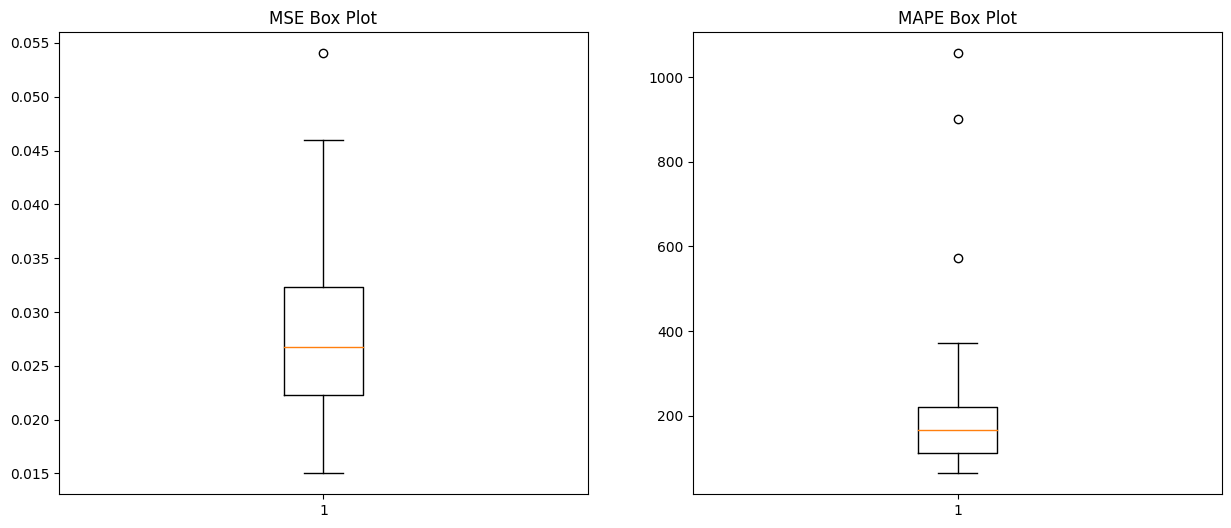

Average MSE: 0.028726712191852747
Variance MSE: 6.918792522319778e-05
Average MAPE: 2.204067075506215
Variance MAPE: 3.835177407193334


In [31]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt



# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']

mse_scores = []
mape_scores = []
included_companies = []

for company in data['Company'].unique():
    # Split data into train and test based on the current company
    train_data = data[data['Company'] != company]
    test_data = data[data['Company'] == company]

    # Flatten train triangles and concatenate them
    all_log_triangles_train = []
    for comp in train_data['Company'].unique():
        triangle_data = train_data[train_data['Company'] == comp].drop(columns=['Company', 'Unnamed: 0']).values
        log_triangle_data = np.log(triangle_data)
        all_log_triangles_train.append(log_triangle_data[~np.isnan(log_triangle_data)])

    y_train = np.concatenate(all_log_triangles_train)

    # Flatten test triangle
    triangle_test = test_data.drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_test = np.log(triangle_test)
    y_test = log_triangle_test[~np.isnan(log_triangle_test)]

    # Create design matrices for train and test
    X_train = np.tile(design_matrix, (len(train_data['Company'].unique()), 1))[:len(y_train)]
    X_test = design_matrix[:len(y_test)]

    # Fit the model on train data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate MSE and MAPE for the current iteration
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_scores.append(mse)
    if mape < 20000:
        mape_scores.append(mape)
        included_companies.append(company)
    else:
        mape_scores.append(None)

# Tabulate the results
results = pd.DataFrame({
    'Company': included_companies,
    'MSE': [mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None],
    'MAPE': [mape for mape in mape_scores if mape is not None]
})

print(results)

# Box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].boxplot([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
ax[0].set_title('MSE Box Plot')
ax[1].boxplot([mape for mape in mape_scores if mape is not None])
ax[1].set_title('MAPE Box Plot')
plt.show()

# Calculate average and variance for MSE and MAPE
avg_mse = np.mean([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
var_mse = np.var([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
avg_mape = np.mean([mape for mape in mape_scores if mape is not None])
var_mape = np.var([mape for mape in mape_scores if mape is not None])

print(f"Average MSE: {avg_mse}")
print(f"Variance MSE: {var_mse}")
print(f"Average MAPE: {avg_mape/100}")
print(f"Variance MAPE: {var_mape/10000}")





Let´s try with RIDGE:

In [32]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']

# Flatten all triangles and concatenate them
all_log_triangles = []
for company in data['Company'].unique():
    triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_data = np.log(triangle_data)
    all_log_triangles.append(log_triangle_data[~np.isnan(log_triangle_data)])

y_values = np.concatenate(all_log_triangles)

# Repeat the design matrix for each triangle
repeated_design_matrix = np.tile(design_matrix, (len(data['Company'].unique()), 1))

# Ensure that the repeated_design_matrix and y_values are of the same length
if len(y_values) != len(repeated_design_matrix):
    raise ValueError("Mismatch between the number of y_values and rows in the repeated design matrix.")

# Fit the Ridge regression model using all triangles
# You can adjust the alpha parameter to control the regularization strength
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(repeated_design_matrix, y_values)

# Predict using the Ridge model
y_pred = ridge_model.predict(repeated_design_matrix)



# Display the results
print(model.summary())
print(ridge_model.coef_)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     274.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:08:31   Log-Likelihood:                 823.27
No. Observations:                3135   AIC:                            -1611.
Df Residuals:                    3117   BIC:                            -1502.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6054      0.010     59.658      0.0

                                Company       MSE         MAPE
0                   Allstate Ins Co Grp  0.053620   185.604373
1                    California Cas Grp  0.034072   108.895158
2                        Celina Mut Grp  0.027500   215.254012
3                    Federal Ins Co Grp  0.032921   144.527662
4                 Farm Bureau Of MI Grp  0.039977   194.729293
5                 West Bend Mut Ins Grp  0.018619   256.663553
6                    Island Ins Cos Grp  0.045632   191.788587
7                       Penn Miller Grp  0.037334   149.536787
8                Farmers Automobile Grp  0.019778   320.472858
9                    State Farm Mut Grp  0.044616    87.409207
10                Erie Ins Exchange Grp  0.017117    97.125550
11            Pennsylvania Natl Ins Grp  0.022295    82.737504
12               Preferred Risk Mut Grp  0.029562   155.362238
13                     Grinnell Mut Grp  0.022006   218.966005
14                        Amerisafe Grp  0.022566   894

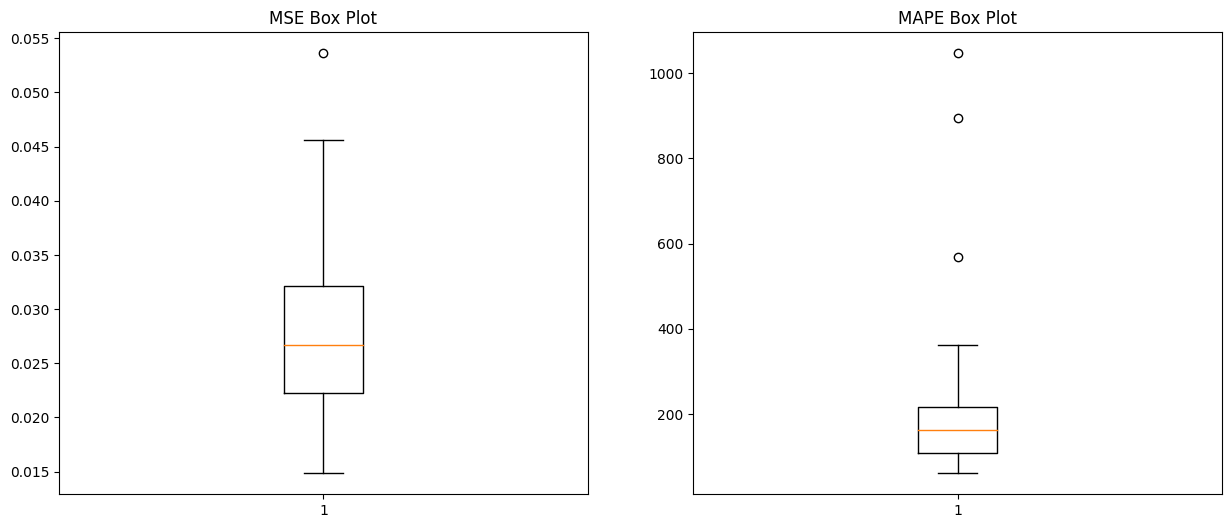

Average MSE: 0.028596357677262048
Variance MSE: 6.766928569424664e-05
Average MAPE: 2.170581421248832
Variance MAPE: 3.7890652433343863


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming 'data' and 'design_matrix' are already defined

ridge_coefficients = np.array([
    0.6054, -0.0437, -0.0618, -0.0787, -0.0918, 0.0022, 0.0111, 0.0455, 0.0258,
    -3.33e-16, -0.3513, -0.4689, -0.5135, -0.5353, -0.5305, -0.5412, -0.5586, -0.5765, -0.6054
])




# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']

mse_scores = []
mape_scores = []
included_companies = []

for company in data['Company'].unique():
    # Split data into train and test based on the current company
    train_data = data[data['Company'] != company]
    test_data = data[data['Company'] == company]

    # Flatten train triangles and concatenate them
    all_log_triangles_train = []
    for comp in train_data['Company'].unique():
        triangle_data = train_data[train_data['Company'] == comp].drop(columns=['Company', 'Unnamed: 0']).values
        log_triangle_data = np.log(triangle_data)
        all_log_triangles_train.append(log_triangle_data[~np.isnan(log_triangle_data)])

    y_train = np.concatenate(all_log_triangles_train)

    # Flatten test triangle
    triangle_test = test_data.drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_test = np.log(triangle_test)
    y_test = log_triangle_test[~np.isnan(log_triangle_test)]

    # Create design matrices for train and test
    X_train = np.tile(design_matrix, (len(train_data['Company'].unique()), 1))[:len(y_train)]
    X_test = design_matrix[:len(y_test)]

    # Fit the model on train data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on test data using Ridge coefficients
    y_pred = np.dot(X_test, ridge_coefficients)

    # Calculate MSE and MAPE for the current iteration
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_scores.append(mse)
    if mape < 20000:
        mape_scores.append(mape)
        included_companies.append(company)
    else:
        mape_scores.append(None)

# Tabulate the results
results = pd.DataFrame({
    'Company': included_companies,
    'MSE': [mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None],
    'MAPE': [mape for mape in mape_scores if mape is not None]
})

print(results)

# Box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].boxplot([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
ax[0].set_title('MSE Box Plot')
ax[1].boxplot([mape for mape in mape_scores if mape is not None])
ax[1].set_title('MAPE Box Plot')
plt.show()

# Calculate average and variance for MSE and MAPE
avg_mse = np.mean([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
var_mse = np.var([mse for mse, mape in zip(mse_scores, mape_scores) if mape is not None])
avg_mape = np.mean([mape for mape in mape_scores if mape is not None])
var_mape = np.var([mape for mape in mape_scores if mape is not None])

print(f"Average MSE: {avg_mse}")
print(f"Variance MSE: {var_mse}")
print(f"Average MAPE: {avg_mape/100}")
print(f"Variance MAPE: {var_mape/10000}")



Now let´s try with Lasso:

In [34]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Remove the triangle for "Sirius Amer Ins Co"
data = data[data['Company'] != 'Sirius Amer Ins Co']

# Flatten all triangles and concatenate them
all_log_triangles = []
for company in data['Company'].unique():
    triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_data = np.log(triangle_data)
    all_log_triangles.append(log_triangle_data[~np.isnan(log_triangle_data)])

y_values = np.concatenate(all_log_triangles)

# Repeat the design matrix for each triangle
repeated_design_matrix = np.tile(design_matrix, (len(data['Company'].unique()), 1))

# Ensure that the repeated_design_matrix and y_values are of the same length
if len(y_values) != len(repeated_design_matrix):
    raise ValueError("Mismatch between the number of y_values and rows in the repeated design matrix.")

# Fit the Lasso regression model using all triangles
# You can adjust the alpha parameter to control the regularization strength
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(repeated_design_matrix, y_values)

# Predict using the Lasso model
y_pred = lasso_model.predict(repeated_design_matrix)

# Display the results
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Coefficients: [ 0.         -0.03132083 -0.04506054 -0.0587233  -0.06804098  0.
  0.00695892  0.04049875  0.02127819  0.         -0.30626482 -0.42328222
 -0.46821848 -0.48975842 -0.49019622 -0.4957492  -0.50594397 -0.5111156
 -0.50631035]


Neural Networks:

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler



# Flatten all triangles and concatenate them
all_log_triangles = []
for company in data['Company'].unique():
    triangle_data = data[data['Company'] == company].drop(columns=['Company', 'Unnamed: 0']).values
    log_triangle_data = np.log(triangle_data)
    all_log_triangles.append(log_triangle_data[~np.isnan(log_triangle_data)])

y = np.concatenate(all_log_triangles)

# Repeat the design matrix for each triangle
X = np.tile(design_matrix.values, (len(data['Company'].unique()), 1))

# Ensure X and y have the same length
assert len(y) == len(X), "Mismatch in the length of X and y"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Predict on test data
y_pred = model.predict(X_test_scaled).flatten()

# Calculate MSE and MAPE
mse = mean_squared_error(y_test, y_pred)


print(f"MSE: {mse}")




Epoch 1/100
72/72 [==============================] - 3s 10ms/step - loss: 0.1959 - val_loss: 0.0582
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0395
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0368
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0334 - val_loss: 0.0356
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0326 - val_loss: 0.0348
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0371
Epoch 7/100
72/72 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0373
Epoch 8/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.0358
Epoch 9/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.0357
Epoch 10/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0329 - val_loss: 0.0364
Epoch 11